In [ ]:
# INTERFACE
from module.core.display import playground
from module.core.Project import Project

# Project('example_project_name') #initiate project 

playground() # loat interface

In [1]:
#INSPECT PROJECT PRAMS
from module.core import ExperimentInformation, TreatmentInformation, Palette
from module.core.Metadata import ExperimentInformation

# TreatmentInformation('TCB-2').open()
Palette("TCB-2").open()
ExperimentInformation("TCB-2").open()


In [ ]:
# TISSUE WEIGHT stats  
from module.core.Figure import StatisticsTable, Histogram, QuantitativeDataSelection

table = StatisticsTable(project="TCB-2", 
                          experiment="weight",
                          region='TCB2_regions', 
                          from_scratch=True
                          )
# table.statistics_table.select(is_significant=True)
table

Preparing statistical groupings for dose response: 100%|██████████| 3/3 [00:00<00:00, 1725.34it/s]


Calculating statistics:   0%|          | 0/3 [00:00<?, ?it/s]

SAVED /home/remi/phd/PROJECTS/TCB2/dose response/histogram/5HT in OF, PL, aCC.png
SAVED /home/remi/phd/PROJECTS/TCB2/dose response/histogram/5HT in OF, PL, aCC.svg
CREATED AND CACHED /home/remi/phd/PROJECTS/TCB2/dose response/histogram/5HT in OF, PL, aCC.png


Histogram(project='TCB2', experiment='dose response', treatment=None, compound='5HT', region=['OF', 'PL', 'aCC'], remove_outliers='calculated', data_source='hplc', p_value_threshold=0.05, pool=None, statistics_pipeline=None, filepath='/home/remi/phd/PROJECTS/TCB2/dose response/histogram/5HT in OF, PL, aCC.png', from_scratch=True, custom_params={}, plot_swarm=True, figure_type='histogram')

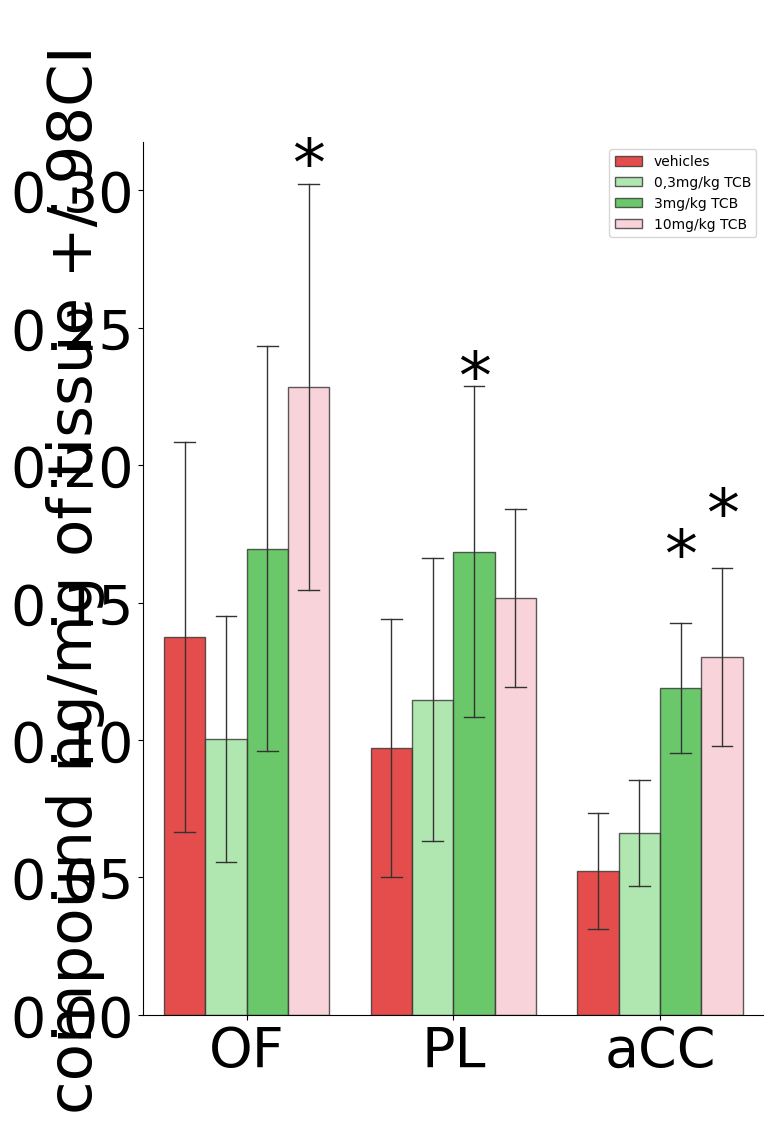

In [8]:
#TISSUE WEIGHT plot 
from module.core.Figure import Histogram


# Histogram(project = 'TCB-2',
#           experiment = 'weight',
#           from_scratch = True, 
#           region = ['SC','VM'])

Histogram(project = 'TCB2',
          experiment = 'dose response',
          compound = '5HT',
          region = 'OF, PL, aCC',
          remove_outliers = 'calculated',
          from_scratch = True, 
          )


In [ ]:
#NORMALITY and AGGREGATE STATS

from module.core.Statistics import AggregateStatistics
AggregateStatistics("TCB-2").select()

In [ ]:
#INSPECT COMPOUND DATA and STATS
from module.core import  HPLC, Statistics, QuantitativeStatistic
from module.core.Constants import * #git issue jas

#RAW data
# data = HPLC('TCB-2').full_df 

#FULLY SIGNIFICANT stats
data = Statistics('TCB-2').df 
data.select(region = 'TCB2_regions', compound= COMPOUND_CLASSES['monoamines'])
# data.select(significant_pair=('3mg/kg TCB-2', 'vehicles'), compound=["GLU", "GABA", "ASP", "GLY", "TAU"])

# CALCULATE SPECIFIC INSIGNIFICANT 
# calculated_statistic = QuantitativeStatistic.calculate(project="TCB-2", experiment=None, compound="weight")
# calculated_statistic.select(test = 'one_way_anova', is_significant = True)

In [ ]:
# PLOT HISTOGRAMS
high_DA = ['A','NAc', 'VM', 'DM', 'VL', 'DL', 'VTA']
low_DA = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","dH","vH","MD","VPL","VPR","DLG","HY","SC","SN","DR","MR","CB"]



DA_high_sig = ['A','NAc', ] #                 / agg_antag ["NAc", "VM", "DM", "VL", "DL"] # none pass 2way
DA_low_sig = ["PL","aCC","S1L","S1R","DLG","HY","SC","DR"] #    , 'OF'   /   agg_antag [ "aCC",  "MR", "S1L"] #S1L didnt pass 2way
DOPAC_DA_sig = ["PL","aCC", "S1L","DM","DLG","CB"] #                / agg_antag ['DM', 'VTA, 'DLG', 'aCC'] #DLG aCC dont pass 2way
toiMT_DA_sig = ["NAc","VM","DM","VL","DL"]
HVA_DA_sig = ['CB',  'HY', 'SC',  'dH'] #      'S1R', 'aCC',   'DR',          / agg_antag ['VTA']

NA_sig= ['aCC','vH', 'NAc','VPL', 'VPR','HY', 'SC', 'SN','VTA'] #VMA/NA in DLG add vH too for summary style / agg_ant ["aCC", "vH"]
VMA_NA_sig = ['DLG']

# "aCC" # ['5HT', 'DA', "NA", 'HVA'] # ["5HIAA/5HT", "5HT/5HTP", "DOPAC/DA"]
DA_sig_twoway = [ 'MR',  'aCC', 'A'] 
DOPAC_DA_sig_twoway = [ 'DM', 'VTA'] #'DM',
HVA_DA_sig_twoway = [ 'VTA']



from module.core.Figure import Histogram
hist = Histogram(project = 'TCB-2', 
                experiment='agonist antagonist', # dose response / agonist antagonist / None / weight
                compound='DA', # 5HIAA/5HT 
                region= 'TCB2_regions', #list
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"fig_width": 20},  # fixed fig with bar width vaires 
                # custom_params={"ylabel_x": -0.02},
                )

In [ ]:
from module.core.Figure import Histogram
hist = Histogram(project = 'TCB-2', 
                experiment='agonist antagonist', 
                compound="NA", 
                region= ["vH"], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"ylabel_x": -0.1}
                )



# hist.statistics.select( test = 'tukey').result

In [ ]:
# SINGLE CORRECLATION
from module.core.Figure import Correlation 

Correlation(project ='TCB-2', 
                experiment='agonist antagonist', 
                treatment = '3mg/kg TCB-2',
                compound='5HT', 
                region= ['S1L','aCC'], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )

In [ ]:
from module.core.Figure import Correlogram 


Correlogram(project ='TCB-2', 
                # experiment='agonist antagonist', 
                compound='5HT',  # 'monoamines'
                region= 'TCB2_regions', 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )

In [4]:
legit_regions = [
    "OF",
    "PL",
    "aCC",
    "M1",
    "SJ",
    "S1L",
    "S1R",
    "AC",
    "V1",
    "MD",
    "VPL",
    "VPR",
    "DLG",
    "DM",
    "DL",
    "VM",
    "VL",
    "NAc",
    "SN",
    "VTA",
    "DR",
    "MR",
    "HY",
    "dH",
    "vH",
    "A",
    "SC",
    "CB"
  ]

In [ ]:
from module.core.Figure import Network 
from module.core.Constants import * 


 
Network(project ='TCB-2', 
                # experiment='agonist antagonist', 
                compound='5HT', 
                region= 'TCB2_condensed', # 'dopamine_vibes' / 'thalamocortical_interaction' / 'TCB2_regions'
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params = { 'edge_thickness': 1} , #'show_edge_labels':True,
                )

#NA     Reds
#DA     Blues
#5HT    Oranges

# print (REGION_CLASSES['thalamocortical_interaction'])

In [ ]:
#TABLES 
from module.core.Figure import Table, StatisticsTable


#DATA TABLE
# Table(project ='TCB-2', 
#                 # experiment='project', 
#                 compound=['5HT', '5HIAA', 'DA', 'DOPAC', 'HVA', '3MT', 'NA'], #SD
#                 treatment = 'vehicles',
#                 region= 'TCB2_regions', 
#                 from_scratch=True, 
#                 remove_outliers='calculated', # calculated / eliminated / False
#                 )

#STATISTICS TABLE
StatisticsTable(project="TCB-2", 
                          experiment="dose response",
                          region='TCB2_regions', 
                          compound = ['5HT', '5HIAA', '5HIAA/5HT', 'DA', 'DOPAC', 'HVA', '3MT', 'DOPAC/DA', 'HVA/DA', '3MT/DA', 'NA'],
                          from_scratch=True
                          )


